In [7]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)


In [8]:
df = pd.read_csv("bank.csv", sep=';')

In [9]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns)

      age  balance  day  duration  campaign  pdays  previous
0      30     1787   19        79         1     -1         0
1      33     4789   11       220         1    339         4
2      35     1350   16       185         1    330         1
3      30     1476    3       199         4     -1         0
4      59        0    5       226         1     -1         0
...   ...      ...  ...       ...       ...    ...       ...
4516   33     -333   30       329         5     -1         0
4517   57    -3313    9       153         1     -1         0
4518   57      295   19       151        11     -1         0
4519   28     1137    6       129         4    211         3
4520   44     1136    3       345         2    249         7

[4521 rows x 7 columns]


In [10]:
def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [11]:
for column in numeric_columns:
    df = remove_outliers_IQR(df, column)

def show_hist(df, column):
    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()


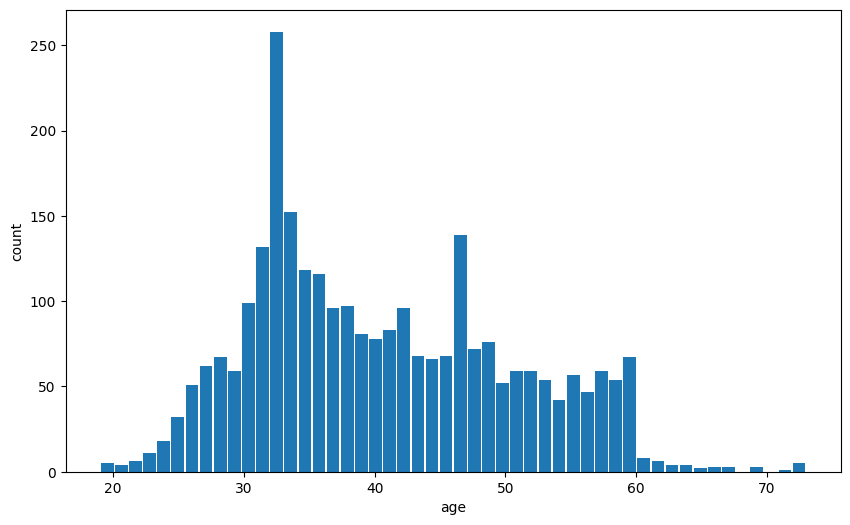

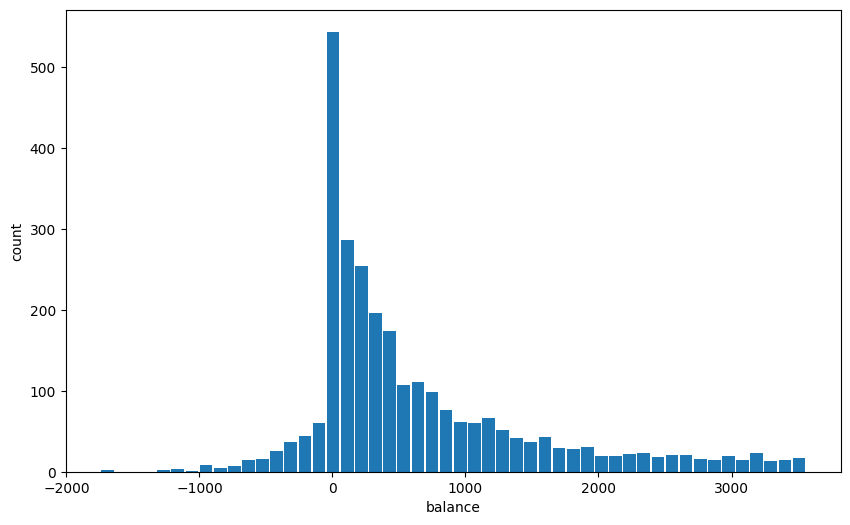

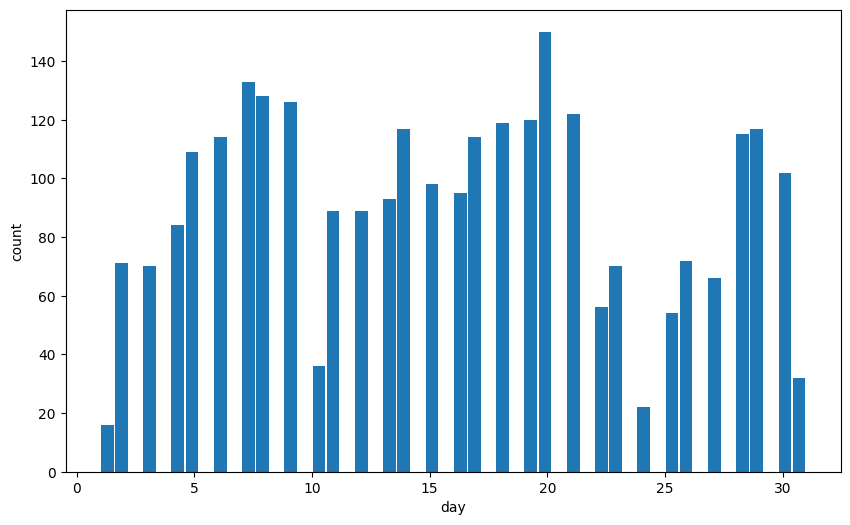

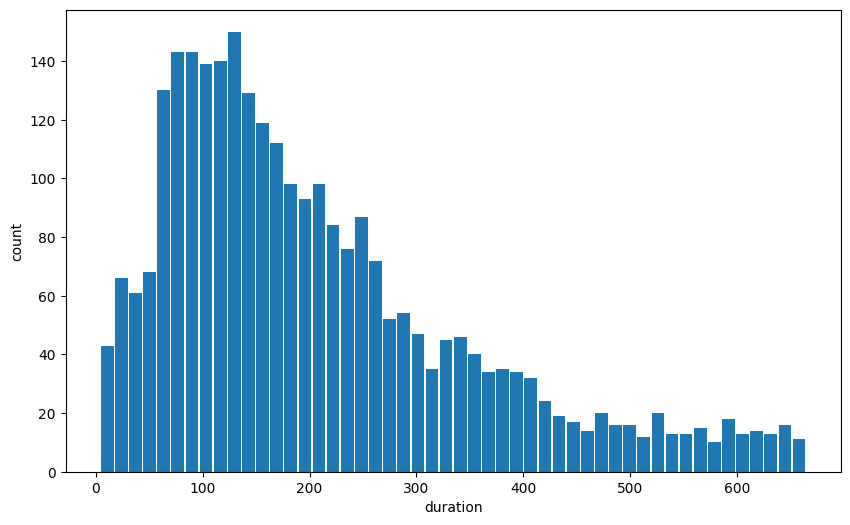

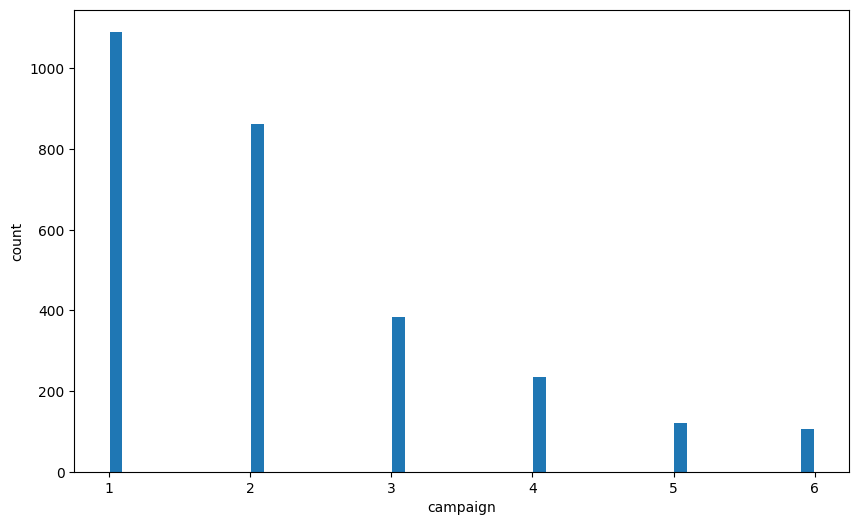

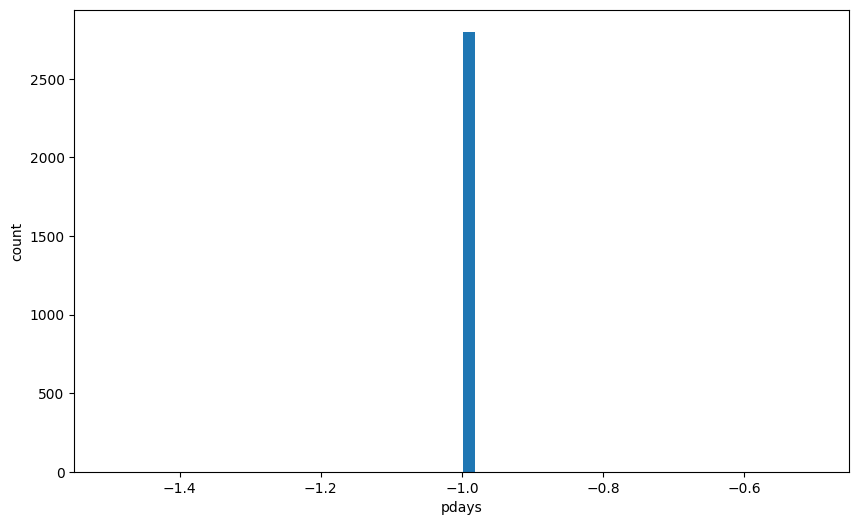

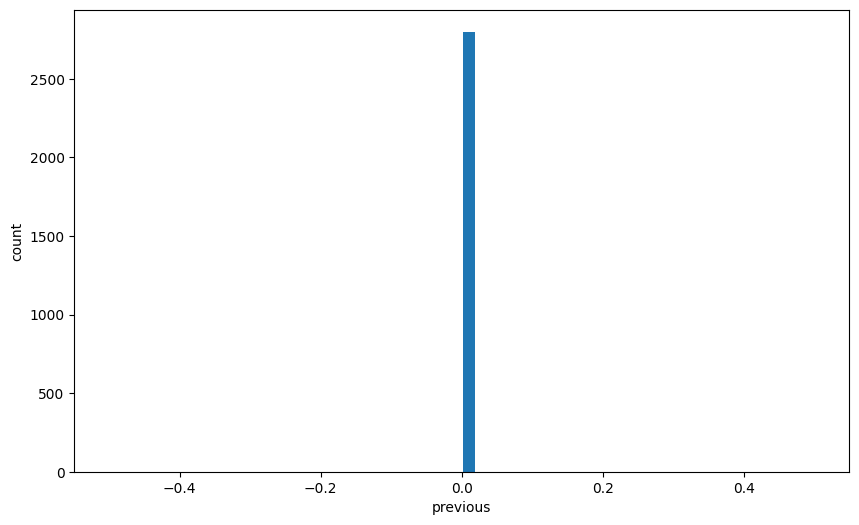

In [12]:
for column in numeric_columns:
    show_hist(df, column)


In [13]:
print(df.shape)
df.to_csv("Bank_cleaned_IQR.csv")

(2799, 17)
